D:/I/NTU/Day 3/Training
(240, 320, 3)


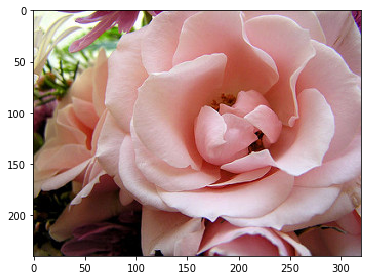

In [25]:
train_root  = "D:/I/NTU/Day 3/Training"
test_root = "D:/I/NTU/Day 3/Test"
print(train_root)

from skimage import io
image = io.imread("D:/I/NTU/Day 3/Training/rose/12240303_80d87f77a3_n.jpg")
print(image.shape)
io.imshow(image)

batch_size = 2

In [26]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size)

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


5


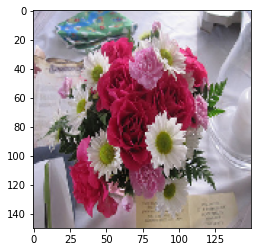

In [27]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)       

In [29]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=10)

Epoch 1/10
2159/2159 [==============================] - 14s 6ms/step - loss: 1.8586 - accuracy: 0.3160
Epoch 2/10
2159/2159 [==============================] - 12s 6ms/step - loss: 1.4068 - accuracy: 0.3933
Epoch 3/10
2159/2159 [==============================] - 13s 6ms/step - loss: 1.3300 - accuracy: 0.4281
Epoch 4/10
2159/2159 [==============================] - 13s 6ms/step - loss: 1.2486 - accuracy: 0.4881
Epoch 5/10
2159/2159 [==============================] - 13s 6ms/step - loss: 1.1735 - accuracy: 0.5353
Epoch 6/10
2159/2159 [==============================] - 13s 6ms/step - loss: 1.1216 - accuracy: 0.5552
Epoch 7/10
2159/2159 [==============================] - 13s 6ms/step - loss: 1.0586 - accuracy: 0.5807
Epoch 8/10
2159/2159 [==============================] - 13s 6ms/step - loss: 0.9768 - accuracy: 0.6231
Epoch 9/10
2159/2159 [==============================] - 13s 6ms/step - loss: 0.9107 - accuracy: 0.6509 0s - loss: 0.9114 - accu
Epoch 10/10
2159/2159 [=========================

In [30]:
score = model.evaluate(train_data)
print(score)

2159/2159 [==============================] - 11s 5ms/step - loss: 0.7803 - accuracy: 0.7306
[0.78033846616745, 0.7305999398231506]


In [31]:
score = model.evaluate(test_data)
print(score)

2159/2159 [==============================] - 12s 6ms/step - loss: 0.7803 - accuracy: 0.7306
[0.7803375720977783, 0.7305999398231506]
